### Robustness check - risk aversion

In [1]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import sharpe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

### How is pi affected by increasing interest rates?

In [2]:
gammas = np.round(np.arange(2, 10, 0.25), 3)

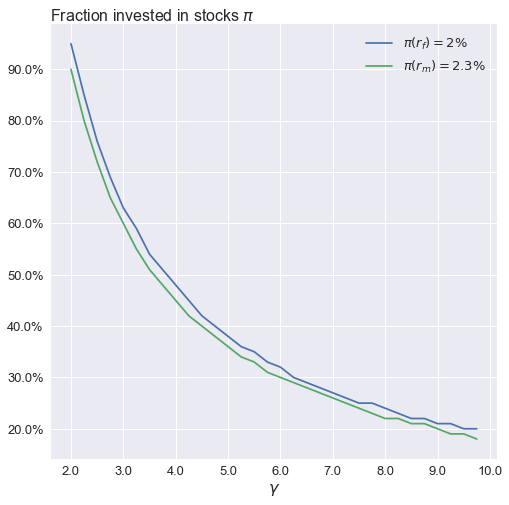

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.lineplot(y=[round(cr.pi_arr(0.02, gamma, 0.02837, 0.076, 0.002)*100, 0) for gamma in gammas], x=gammas, legend=False)
sns.lineplot(y=[round(cr.pi_arr(0.023, gamma, 0.02837, 0.076, 0.002)*100, 0) for gamma in gammas], x=gammas, legend=False)
ax.legend(['$\pi(r_f) = 2\%$', '$\pi(r_m) = 2.3\%$'])
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:.1f}".format(x)))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: "{}%".format(y)))
ax.set_ylabel('Fraction invested in stocks $\pi$', loc='top', rotation=0, labelpad=-248)
ax.set_xlabel('$\gamma$')
fig.savefig('Robustness/pi_gamma.png', bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

In [4]:
gamma2 = cr.fetch_returns('garch', range(10000), GAMMA=2)
gamma3 = cr.fetch_returns('garch', range(10000), GAMMA=3)
gamma4 = cr.fetch_returns('garch', range(10000), GAMMA=4)
gamma5 = cr.fetch_returns('garch', range(10000), GAMMA=5)

### Dual-target

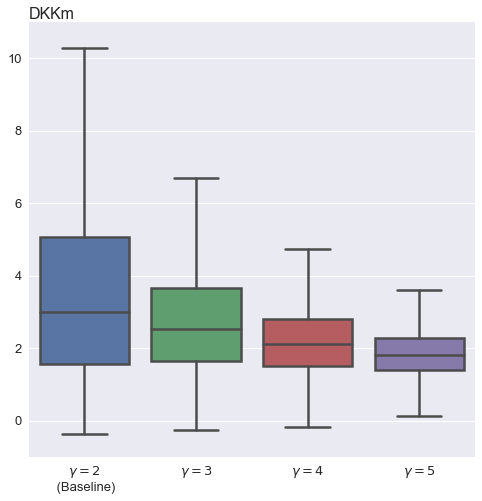

In [8]:
data=gamma2.loc[:, ["dual_phase"]]
data.columns=['$\gamma = 2$\n (Baseline)']
data['$\gamma = 3$']=gamma3["dual_phase"]
data['$\gamma = 4$']=gamma4["dual_phase"]
data['$\gamma = 5$']=gamma5["dual_phase"]

x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.boxplot(x='variable', y='value', data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("DKKm", loc='top', rotation=0, labelpad=-67)
ax.set_xlabel("")
ax.set_ylim(-1, 11)
f.savefig("Robustness/boxplot_gamma_dual.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

### Single-target

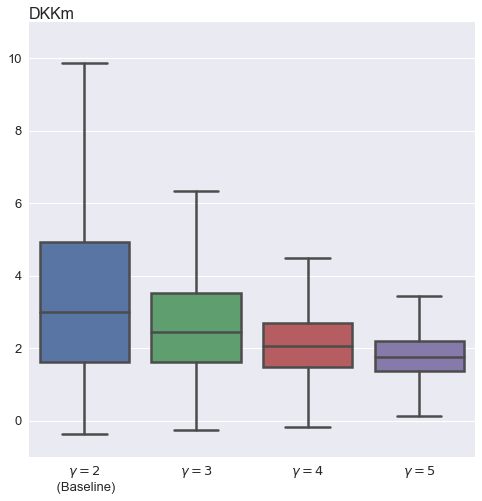

In [9]:
data=gamma2.loc[:, ["single_phase"]]
data.columns=['$\gamma = 2$\n (Baseline)']
data['$\gamma = 3$']=gamma3["single_phase"]
data['$\gamma = 4$']=gamma4["single_phase"]
data['$\gamma = 5$']=gamma5["single_phase"]

x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("DKKm", loc='top', rotation=0, labelpad=-67)
ax.set_xlabel("")
ax.set_ylim(-1, 11)
f.savefig("Robustness/boxplot_gamma_single.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

### Calculating sharpe ratio

In [4]:
sharpe2 = sharpe.calculate_sharpe(gamma2)
sharpe3 = sharpe.calculate_sharpe(gamma3)
sharpe4 = sharpe.calculate_sharpe(gamma4)
sharpe5 = sharpe.calculate_sharpe(gamma5)

In [5]:
print(sharpe2.std())
print(sharpe3.std())
print(sharpe4.std())
print(sharpe5.std())

Dual phase     0.090
Single phase   0.090
100% stocks    0.088
Life cycle     0.092
dtype: float64
Dual phase     0.077
Single phase   0.077
100% stocks    0.084
Life cycle     0.091
dtype: float64
Dual phase     0.070
Single phase   0.070
100% stocks    0.082
Life cycle     0.091
dtype: float64
Dual phase     0.064
Single phase   0.063
100% stocks    0.081
Life cycle     0.090
dtype: float64


In [4]:
mean_median_2 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe2.mean(), sharpe2.median())]
mean_median_3 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe3.mean(), sharpe3.median())]
mean_median_4 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe4.mean(), sharpe4.median())]
mean_median_5 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe5.mean(), sharpe5.median())]

In [5]:
print(pd.DataFrame([mean_median_2, mean_median_3, mean_median_4, mean_median_5],
             columns=['Dual phase', 'Single phase', 'All stock', 'Life cycle'],
             index = pd.Index(['$gamma = 2$', '$gamma = 3$', '$gamma = 4$', '$gamma = 5$'])).to_latex())

\begin{tabular}{lllll}
\toprule
{} &     Dual phase &   Single phase &      All stock &     Life cycle \\
\midrule
\$gamma = 2\$ &  0.161 [0.174] &  0.159 [0.171] &  0.152 [0.146] &  0.124 [0.119] \\
\$gamma = 3\$ &  0.145 [0.155] &  0.143 [0.153] &  0.152 [0.146] &  0.124 [0.118] \\
\$gamma = 4\$ &  0.132 [0.141] &  0.130 [0.139] &  0.151 [0.146] &  0.123 [0.117] \\
\$gamma = 5\$ &  0.123 [0.131] &  0.121 [0.130] &  0.151 [0.146] &  0.123 [0.117] \\
\bottomrule
\end{tabular}



<AxesSubplot:ylabel='Density'>

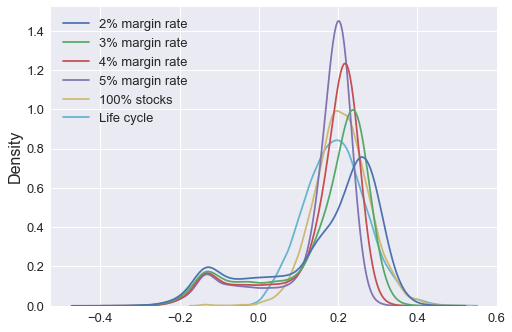

In [31]:
data=sharpe2.loc[:, ["Dual phase"]]
data.columns=['2% margin rate']
data["3% margin rate"]=sharpe3["Dual phase"]
data["4% margin rate"]=sharpe4["Dual phase"]
data["5% margin rate"]=sharpe5["Dual phase"]
data["100% stocks"]=sharpe5["100% stocks"]
data["Life cycle"]=sharpe5["Life cycle"]

sns.kdeplot(data = data)

Certainty equivalent

In [ ]:
#sharpe.CE_ports(gamma2)
#sharpe.CE_ports(gamma3)
#sharpe.CE_ports(gamma4)
sharpe.CE_ports(gamma5) 

Default risk

In [1]:
gamma2_defaulted = gamma2.loc[(slice(None), '2070-01-01'),:]
gamma2_defaulted =gamma2_defaulted[gamma2_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_gamma2=gamma2_defaulted['random_state'].tolist()

gamma3_defaulted = gamma3.loc[(slice(None), '2070-01-01'),:]
gamma3_defaulted =gamma3_defaulted[gamma3_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)\n",
defaulted_gamma3=gamma3_defaulted['random_state'].tolist()

gamma4_defaulted = gamma4.loc[(slice(None), '2070-01-01'),:]
gamma4_defaulted =gamma4_defaulted[gamma4_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)\n",
defaulted_gamma4=gamma4_defaulted['random_state'].tolist()

gamma5_defaulted = gamma5.loc[(slice(None), '2070-01-01'),:]
gamma5_defaulted =gamma5_defaulted[gamma5_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)\n",
defaulted_gamma5=gamma5_defaulted['random_state'].tolist()
#print number of defaults
print(len(defaulted_gamma2))
print(len(defaulted_gamma3))
print(len(defaulted_gamma4))
print(len(defaulted_gamma5))

NameError: name 'gamma2' is not defined